In [10]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

### Carregando os dados

In [11]:
df_preguicas = pd.read_csv('preguicas.csv')

df_preguicas

,DAY,DATE,ID,WEATHER,TIME,BEHAVIOR,DAILY R.FREQUENCY,HOURLY R.FREQUENCY,TEMP MED
0,1,8/18/2020,BTPF02,cloudy,07:00,Feeding,0.00,0.0,21.73
1,1,8/18/2020,BTPF02,cloudy,07:00,Others,0.00,0.0,21.73
2,1,8/18/2020,BTPF02,cloudy,07:00,Traveling,0.00,0.0,21.73
3,1,8/18/2020,BTPF02,cloudy,07:00,Others,0.00,0.0,21.73
4,1,8/18/2020,BTPF02,cloudy,07:00,Resting,0.11,1.0,21.73
...,...,...,...,...,...,...,...,...,...
1775,5,9/22/2020,BTPF09,sunny,11:00,Feeding,0.00,0.0,31.10
1776,5,9/22/2020,BTPF09,sunny,11:00,Others,0.00,0.0,31.10
1777,5,9/22/2020,BTPF09,sunny,11:00,Traveling,0.00,0.0,31.10
1778,5,9/22/2020,BTPF09,sunny,11:00,Others,0.00,0.0,31.10


<b>Observações</b>:

- Em 'Weather' a categoria 'cloudy' inclui ambas as condições nublado e nublado + chuva.

### Olhando o tipo de dado

In [12]:
df_preguicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DAY                 1780 non-null   int64  
 1   DATE                1780 non-null   object 
 2   ID                  1780 non-null   object 
 3   WEATHER             1780 non-null   object 
 4   TIME                1780 non-null   object 
 5   BEHAVIOR            1780 non-null   object 
 6   DAILY R.FREQUENCY   1730 non-null   float64
 7   HOURLY R.FREQUENCY  1725 non-null   float64
 8   TEMP MED            1285 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 125.3+ KB


#### Fazendo a limpeza do data frame e padronizando os dados

- A coluna DAILY R. FREQUENCY traz a a frequencia em que as preguiças engajaram determinado comportamento ao longo do dia (% de tempo no dia em que comera, dormiram, etc). Biológicamente falando essa variável não traria muitos insights para nós, a não ser que estivesse sendo utilizada atrelada a outra variável. Isto é, não é tão interessante saber qual dia a preguiça esteve mais ativa ou menos, porém é interessante saber em que faixas de hora do dia ela realiza suas atividades, por exemplo. Por esse motivo iremos excluir a coluna <B> DAILY R.FREQUENCY</B>

In [30]:
df_preguicas = df_preguicas.drop('DAILY R.FREQUENCY', axis=1)

- Como já olhei o data frame antes no excel, sei que existem algumas células em branco:

In [31]:
nulos = df_preguicas.isna()

nulos.sum() #Somando todos os valores TRUE obtenho o número de células em branco em cada uma das colunas do data frame


DAY                     0
DATE                    0
ID                      0
WEATHER                 0
TIME                    0
BEHAVIOR                0
HOURLY R.FREQUENCY     55
TEMP MED              495
dtype: int64

In [32]:
df_preguicas = df_preguicas.dropna()

df_preguicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 0 to 1779
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DAY                 1232 non-null   int64  
 1   DATE                1232 non-null   object 
 2   ID                  1232 non-null   object 
 3   WEATHER             1232 non-null   object 
 4   TIME                1232 non-null   object 
 5   BEHAVIOR            1232 non-null   object 
 6   HOURLY R.FREQUENCY  1232 non-null   float64
 7   TEMP MED            1232 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 86.6+ KB


- As colunas <b>DAILY R.FREQUENCY</b> e <b>TEMP MED</b> possuem 2 casas decimais, e apenas a <b>HOURLY R.FREQUENCY</b> possui 1 casa decimal. Quero que todos os valores numéricos da tabela.

In [64]:
df_preguicas['HOURLY R.FREQUENCY'] = df_preguicas['HOURLY R.FREQUENCY'].round(2)

df_preguicas #por algum motivo não alterou para 2 casas decimais, porém isso não interfere nas análises realizadas, apenas na forma que o número é mostrado.

,DAY,DATE,ID,WEATHER,TIME,BEHAVIOR,DAILY R.FREQUENCY,HOURLY R.FREQUENCY,TEMP MED
0,1,8/18/2020,BTPF02,cloudy,07:00,Feeding,0.00,0.0,21.73
1,1,8/18/2020,BTPF02,cloudy,07:00,Others,0.00,0.0,21.73
2,1,8/18/2020,BTPF02,cloudy,07:00,Traveling,0.00,0.0,21.73
3,1,8/18/2020,BTPF02,cloudy,07:00,Others,0.00,0.0,21.73
4,1,8/18/2020,BTPF02,cloudy,07:00,Resting,0.11,1.0,21.73
...,...,...,...,...,...,...,...,...,...
1775,5,9/22/2020,BTPF09,sunny,11:00,Feeding,0.00,0.0,31.10
1776,5,9/22/2020,BTPF09,sunny,11:00,Others,0.00,0.0,31.10
1777,5,9/22/2020,BTPF09,sunny,11:00,Traveling,0.00,0.0,31.10
1778,5,9/22/2020,BTPF09,sunny,11:00,Others,0.00,0.0,31.10


## Análises Descritivas

#### Temperatura

- Temperatura média

In [18]:
df_preguicas['TEMP MED'].describe()

count    1285.000000
mean       26.909922
std         2.143572
min        21.700000
25%        25.480000
50%        27.140000
75%        28.440000
max        32.900000
Name: TEMP MED, dtype: float64

- Distribuição dos dados de temperatura/hora

Text(0.5, 0, 'Time')

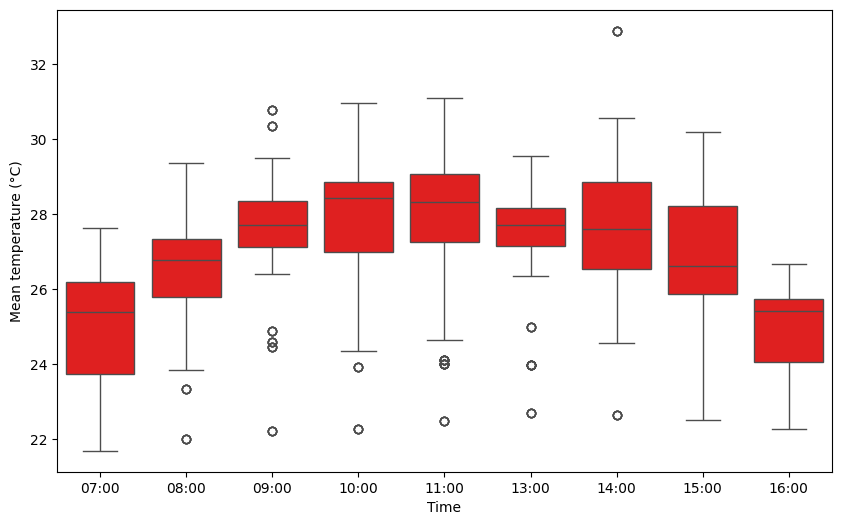

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_preguicas['TIME'], y=df_preguicas['TEMP MED'], color='red')
plt.ylabel('Mean temperature (°C)')
plt.xlabel('Time')


Esses outliers podem ser explicados pela forma de coleta dos dados: foram usados dataloggers (dispositivos que coletam temperatura ambiente) poicionados aleatoriamente num fragmento florestal, a 10-12m do solo, provavelmente alguns dataloggers foram posicionados mais no interior da floresta (onde a temperatura é um pouco menor) e outros mais na borda ou em áreas mais abertar (e consequentemente mais expostas ao sol).

Outra questão é também é que os dados foram coletados de 10 em 10 minutos (7h, 7h10, 7h20...) ao longo de 3 meses sob diferentes condições climáticas abrindo possibilidade para uma maior variação nos dados coletados.

- Comportamento/variação da temperatura média ao longo das horas de observação

Text(0.5, 0, 'Time')

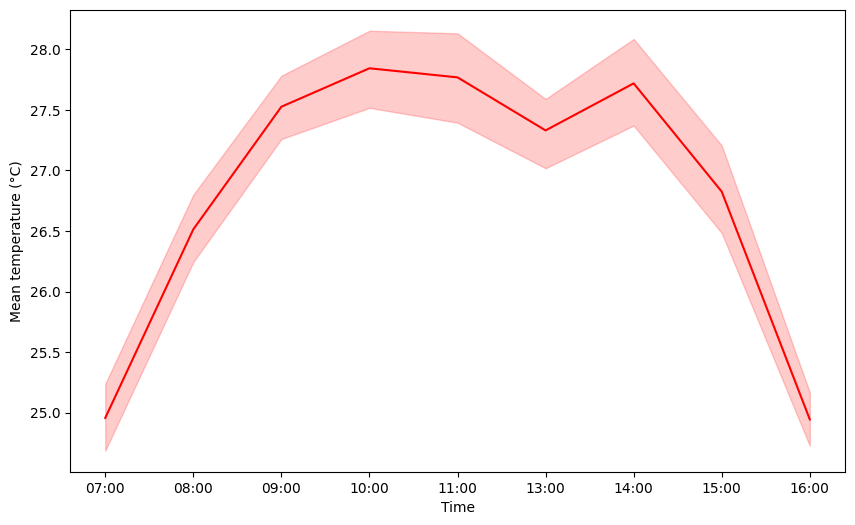

In [110]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_preguicas['TIME'], y=df_preguicas['TEMP MED'], color='red')
plt.ylabel('Mean temperature (°C)')
plt.xlabel('Time')

Podemos perceber um pico de temperatura entre as 14h e as 15h, intervalo no qual foram registradas as maiores temperaturas do dia. O intervalo das 8h às 15h apresenta um grande desvio, possívelmente explicado pela presença dos outliers mostrados no boxplot acima.

- Olhando a temperatura por condição de tempo ('WEATHER'):

Text(0.5, 0, 'Time')

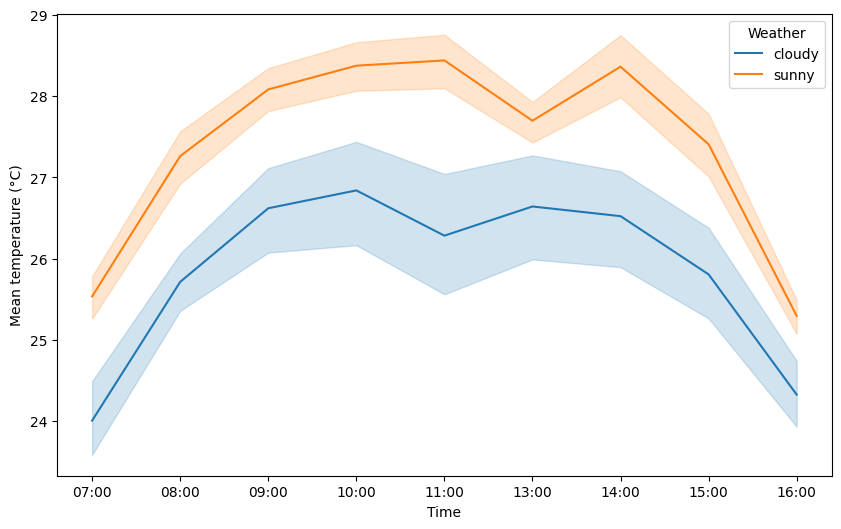

In [108]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_preguicas['TIME'], y=df_preguicas['TEMP MED'], hue='WEATHER', data=df_preguicas)
plt.legend(title='Weather')
plt.ylabel('Mean temperature (°C)')
plt.xlabel('Time')

No gráfico acima podemos atestar um resultado esperado, as temperaturas em condição ensolarada são maiores que as em condição nublada (condições chuvosas estão inclusas aqui também). Os dados de condição 'cloudy' apresentam um desvio maior se comparados com os de dias ensolarados.

#### Comportamento Geral (Considerando toda a população)

In [34]:
df_preguicas['HOURLY R.FREQUENCY'].describe() #não faz sentido pois o mínimo sempre será 'inatividade' e o máximo sempre será 'atividade'.

count    1232.000000
mean        0.200536
std         0.357407
min         0.000000
25%         0.000000
50%         0.000000
75%         0.170000
max         1.000000
Name: HOURLY R.FREQUENCY, dtype: float64

- % Média geral de atividade

In [35]:
df_preguicas['HOURLY R.FREQUENCY'].mean()*100 #Durante o período de estudo as preguiças estiveram ativas em 20% de um intervalo de 1h.



20.05357142857143

In [36]:
atividades=df_preguicas.groupby('BEHAVIOR')['HOURLY R.FREQUENCY'].mean()*100

In [37]:
df_resultado = pd.DataFrame(df_preguicas.groupby('BEHAVIOR')['HOURLY R.FREQUENCY'].mean()*100)
df_resultado


,HOURLY R.FREQUENCY
BEHAVIOR,
Feeding,18.631579
Others,3.040650
Resting,70.703252
Traveling,4.919028


Text(0.5, 0, 'Behavior')

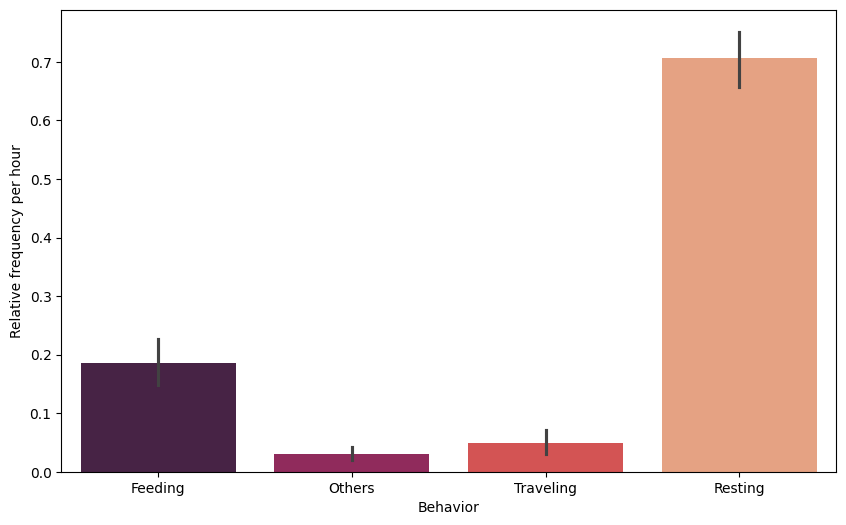

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_preguicas['BEHAVIOR'], y=df_preguicas['HOURLY R.FREQUENCY'], palette='rocket', hue=df_preguicas['BEHAVIOR'])
plt.ylabel('Relative frequency per hour')
plt.xlabel('Behavior')


- % de tempo em que as preguiças estiveram ativas (comendo, deslocando-se ou outros comportamentos que não repouso)

Text(0, 0.5, 'Relative frequency per hour')

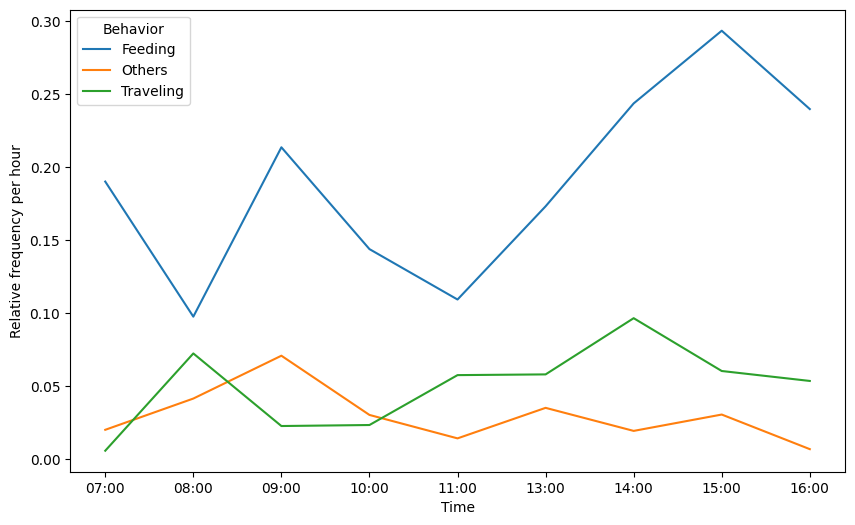

In [105]:
df_ativo = df_preguicas[df_preguicas['BEHAVIOR'] != 'Resting']
plt.figure(figsize=(10, 6))
sns.lineplot(x='TIME', y='HOURLY R.FREQUENCY', hue='BEHAVIOR', data=df_ativo, errorbar=None)
plt.legend(title='Behavior')
plt.xlabel('Time')
plt.ylabel('Relative frequency per hour')



Podemos perceber que:
- Elas aparentemente possuem dois picos de alimentação às 9h e outro às 15h;
- Se locomovem mais por volta das 8h e depois por volta das 14h, onde parecem se locomover um pouco mais que pela manhã.

No gráfico acima, vemos o quando elas desempenharam cada comportamento ao longo dos intervalos de hora.
Se juntarmos todas essas frequências, podemos criar uma variável que representa a % de tempo em que elas estiveram ativas ao longo das horas:

C:\Users\rocme\AppData\Local\Temp\ipykernel_5468\3817884066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ativo.loc[df_ativo['BEHAVIOR'].isin(comportamentos), 'activity'] = df_ativo.groupby('TIME')['HOURLY R.FREQUENCY'].transform('mean')*100


Text(0, 0.5, 'Relative frequency of activity (%)')

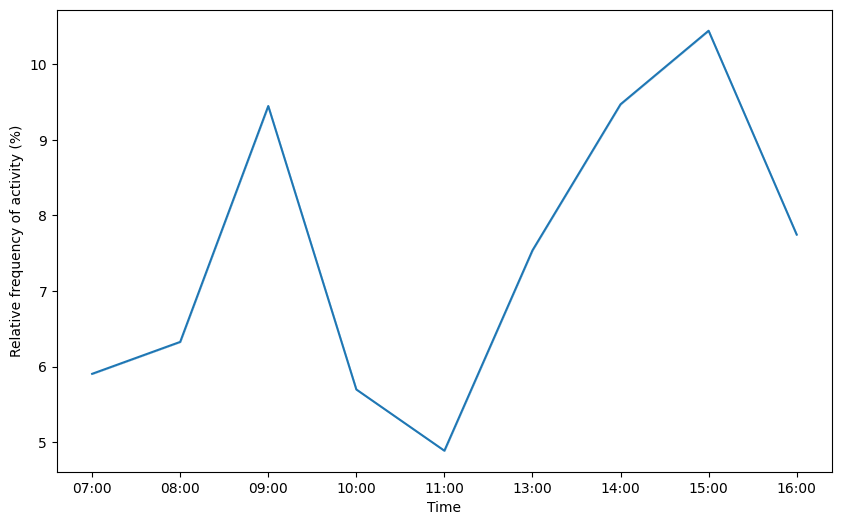

In [113]:
df_ativo = df_preguicas[df_preguicas['BEHAVIOR'] != 'Resting']
comportamentos = ['Feeding', 'Others', 'Traveling']
df_ativo.loc[df_ativo['BEHAVIOR'].isin(comportamentos), 'activity'] = df_ativo.groupby('TIME')['HOURLY R.FREQUENCY'].transform('mean')*100


plt.figure(figsize=(10, 6))
sns.lineplot(x='TIME', y='activity', data =df_ativo)
plt.xlabel('Time')
plt.ylabel('Relative frequency of activity (%)')

O gráfico acima vemos a junção dos comportamentos representando uma única linha de atividade. Vemos que a baixa atividade tem uma queda muito grande às 11h voltando a subir logo em seguida e caindo novamente após as 15h.

- Será que podemos identificar semelhanças no comportamento dos dados de atividade e temperatura média?

C:\Users\rocme\AppData\Local\Temp\ipykernel_5468\3394644420.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='TIME', y='TEMP MED', data=df_ativo, ci=None, ax=ax2, color='red')


Text(0, 0.5, 'Mean temperature (°C)')

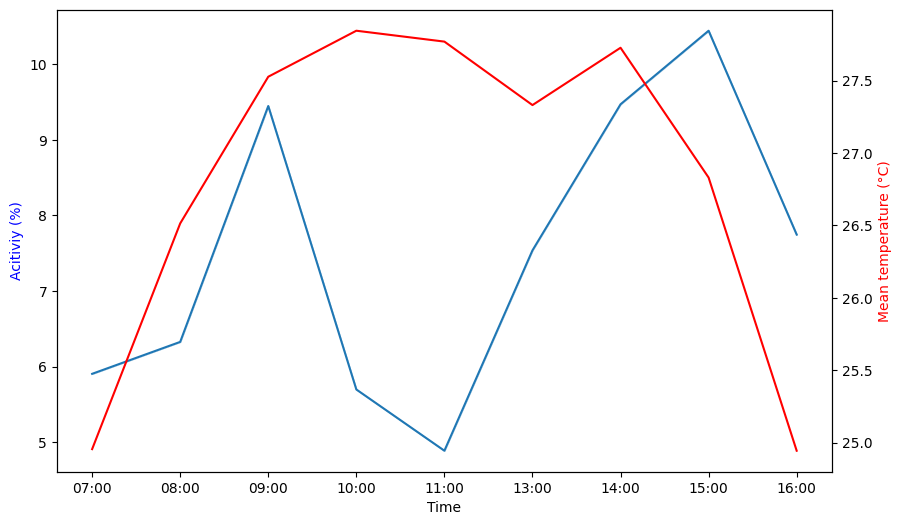

In [114]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TIME', y='activity', data=df_ativo)
plt.ylabel('Acitiviy (%)', color='blue')
plt.xlabel('Time')
ax2 = plt.twinx()
sns.lineplot(x='TIME', y='TEMP MED', data=df_ativo, ci=None, ax=ax2, color='red')
ax2.set_ylabel('Mean temperature (°C)', color='red')




A partir do gráfico acima, aparentemente, a temperatura média parece não ser um bom indicativo de atividade para as peguiças. No entanto, podemos ver que a média que a temperatura aumenta, no início da manhã, as preguiças tornam-se mais ativas e ao final da tarde, quando a temperatura declina, a atividade delas também começa a declinar (com um considerável delay).

- Será que as preguiças são mais ativas quando o tempo está nublado ou ensolarado?

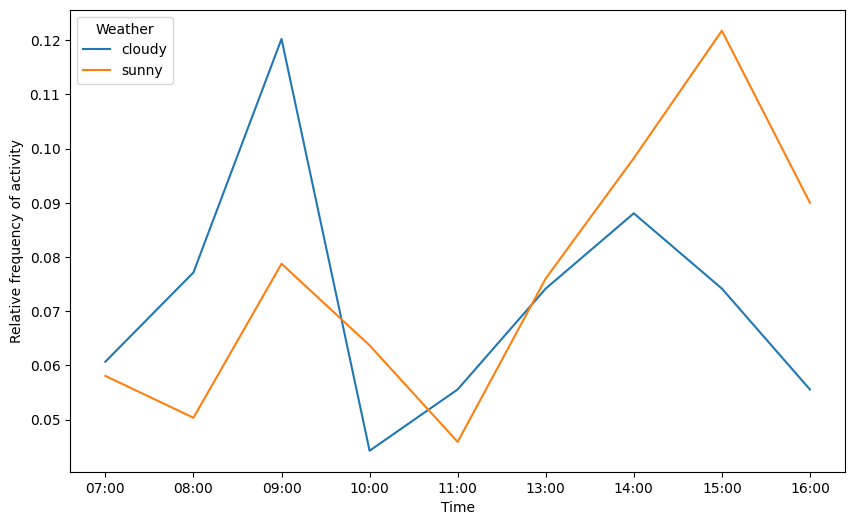

In [198]:
df_ativo = df_preguicas[df_preguicas['BEHAVIOR'] != 'Resting'].copy()
comportamentos = ['Feeding', 'Others', 'Traveling']
df_ativo.loc[df_ativo['BEHAVIOR'].isin(comportamentos), 'activity'] = df_ativo.groupby('TIME')['HOURLY R.FREQUENCY'].transform('mean')

plt.figure(figsize=(10, 6))
sns.lineplot(x='TIME', y='HOURLY R.FREQUENCY', hue='WEATHER', data=df_preguicas, errorbar=None)
plt.xlabel('Time')
plt.ylabel('Relative frequency of activity')
plt.legend(title='Weather')

Percebemos que:

- As preguiças são mais ativas pela manhã em condições nubladas;
- Já em condições ensolaradas elas preferem realizar suas atividades ao final da tarde.

#### Comportamentos Individuais

- Conferindo quantos indivíduos temos

In [120]:
individuos = df_preguicas.groupby('ID')

for nome, grupo in individuos:
    print(nome) # temos 8 indivíduos


BTPF02
BTPF03
BTPF04
BTPF05
BTPF06
BTPF07
BTPF08
BTPF09


- Quanto % do tempo, em média, cada preguiça esteve ativa?

In [195]:
df_preguicas.groupby('ID')['HOURLY R.FREQUENCY'].mean()*100

df_preguicas.groupby('ID')['HOURLY R.FREQUENCY'].describe()


ID
BTPF02    20.000000
BTPF03    19.858537
BTPF04    20.274775
BTPF05    20.004878
BTPF06    20.000000
BTPF07    20.008889
BTPF08    20.098131
BTPF09    20.102941
Name: HOURLY R.FREQUENCY, dtype: float64

- Distribuição dos dados de R.frequency por indivíduo:

Text(0.5, 0, 'ID')

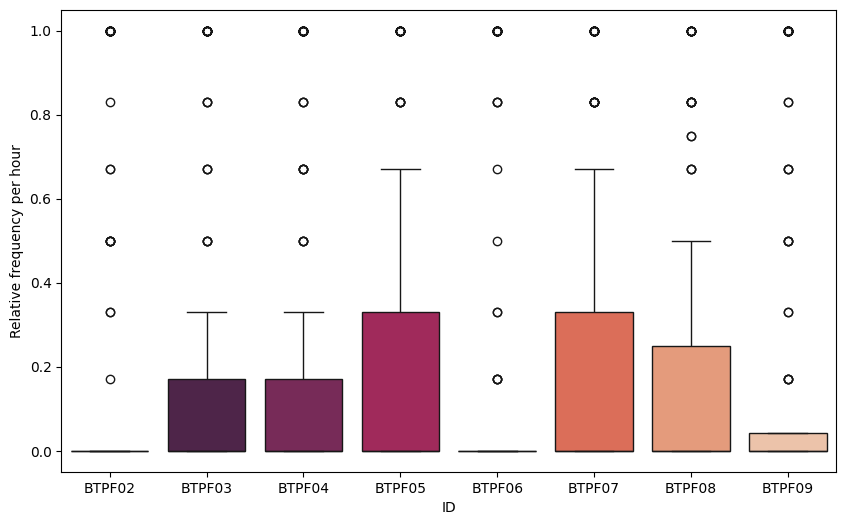

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ID', y='HOURLY R.FREQUENCY', palette='rocket', hue='ID', data=df_preguicas)
plt.ylabel('Relative frequency per hour')
plt.xlabel('ID')


Boxplot mostra a média de atividade das preguiças (considerando repouso). A média está muito próxima da base do quadrado (Q1) indicando uma concentração de valores abaixo da média, o que pode ser explicado pela natureza dos dados, que contém muitos 0 (representando inatividade das preguiças) vs. poucos dados acima de 0 (onde a preguiça esteve engajada em comportamento x).

- % média de tempo em cada atividade para cada preguiça

Como meu data frame tem diferentes indíviduos de bicho-preguiça e diferentes categorias de atividade, é interessante organizá-los separadamente para conseguir olhar para a cada um. Usaremos o groupby()

In [230]:
individuos_atv = df_preguicas.groupby(['ID', 'BEHAVIOR'])

#for nome, grupo in individuos_atv:
#    print(grupo)

ind_comp =df_preguicas.groupby(['ID', 'BEHAVIOR'])['HOURLY R.FREQUENCY']
ind_comp.mean()

ID      BEHAVIOR 
BTPF02  Feeding      0.104815
        Others       0.000000
        Resting      0.072244
        Traveling    0.018519
BTPF03  Feeding      0.557391
        Others       0.007391
        Resting      0.075349
        Traveling    0.022174
BTPF04  Feeding      0.185278
        Others       0.004857
        Resting      0.075548
        Traveling    0.013889
BTPF05  Feeding      0.171875
        Others       0.057344
        Resting      0.072248
        Traveling    0.099375
BTPF06  Feeding      0.074074
        Others       0.006296
        Resting      0.076043
        Traveling    0.006296
BTPF07  Feeding      0.160000
        Others       0.075111
        Resting      0.074749
        Traveling    0.052444
BTPF08  Feeding      0.246400
        Others       0.056800
        Resting      0.074608
        Traveling    0.150400
BTPF09  Feeding      0.088750
        Others       0.010469
        Resting      0.072330
        Traveling    0.036563
Name: HOURLY R.FREQUEN

Text(0.5, 0, 'ID')

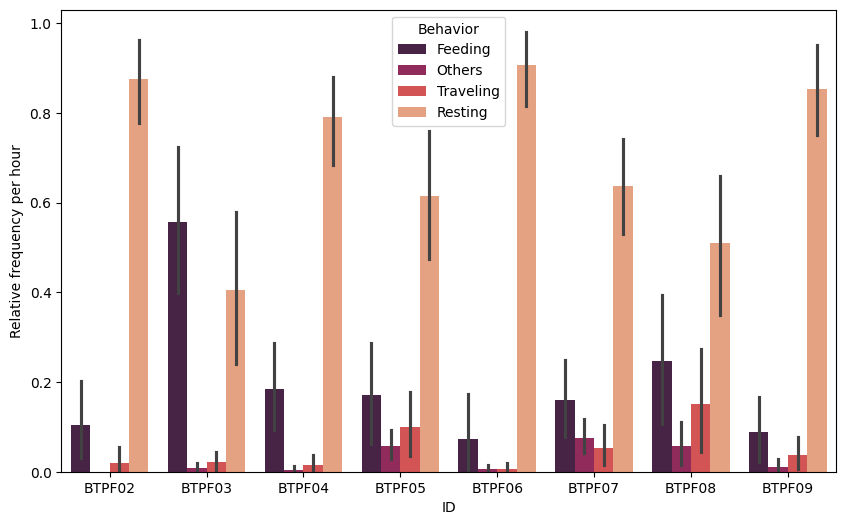

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_preguicas['ID'], y=df_preguicas['HOURLY R.FREQUENCY'], palette='rocket', hue=df_preguicas['BEHAVIOR'])
plt.legend(title='Behavior')
plt.ylabel('Relative frequency per hour')
plt.xlabel('ID')


- Dentre todas as preguiças a BTPF03 foi a que comeu mais do que repousou, sendo também a que mais se alimentou dentre todas as outras preguiças. Isso se deve ao fato dela ser uma fêmea gestante, precisando de um maior aporte de energia.
- Todas as outras peguiças repousaram em, pelo menos, 40% do tempo. Sendo que BTPF02, BTPF06 e BTPF09 as mais preguiçosas do grupo.
- BTPF08 foi a preguiça que mais se deslocou durante o estudo.
- BTPF08, também, foi a preguiça que mais exibiu 'outros' comportamentos (vocalização, autocatação/coçar-se e evacuação).
